## Notebook to build gpl files from mnist dataset

In [1]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
import xml.dom.minidom
from lxml import etree
import random 
import gpl_parser as gpl
import os

%matplotlib inline

In [2]:
def replace_random(arr, num):
    
    ''' replaces randomly num elements in matrix arr with 0 '''
    
    temp = np.asarray(arr)   # Cast to numpy array
    shape = temp.shape       # Store original shape
    temp = temp.flatten()    # Flatten to 1D
    inds = np.random.choice(temp.size, size=num)   # Get random indices
    temp[inds] = 0       # Fill with zeros
    temp = temp.reshape(shape)                     # Restore original shape
    
    return temp

In [3]:
def gpl_matrix(images, idx):
    
    """takes an input of the mnist image list
       outputs a matrix for the xml of the idxs image in the list """
    
    im = np.array(images[idx])
    # create matrix from vector
    im = np.reshape(im, [28, 28])
    # make binary
    im_thresh = np.where(im>200, 1, 0)
    # repeat to a 56 x 56 matrix
    im_up = im_thresh.repeat(2, axis = 0).repeat(2, axis = 1)
    
    ## this comment is hard to understand, replace it with a better one
    # this function is hard to understand, replace it with a better one
    im_rep = replace_random(im_up, 5000)

    return im_rep

In [12]:
def build_xmL(num_inds, out_path):

    
    inds = "1-{}".format(num_inds)
    # initialise the xml file 
    top_elem = etree.Element("PVSavedMarkPointSeriesElements")

    top_elem.set("CalcFunctMap", "False")
    top_elem.set("IterationDelay", "0.00")
    top_elem.set("Iterations", "1")

    second_elem = etree.Element("PVMarkPointElement")
    second_elem.set("parameterSet", "CurrentSettings")
    second_elem.set("VoltageRecCategoryName", "None")
    second_elem.set("VoltageOutputCategoryName", "None")
    second_elem.set("AsyncSyncFrequency", "None")
    second_elem.set("TriggerCount", "1")
    second_elem.set("TriggerSelection", "None")
    second_elem.set("TriggerFrequency", "None")
    second_elem.set("UncagingLaserPower", "2")
    second_elem.set("UncagingLaser", "Uncaging")
    second_elem.set("Repetitions", "1")

    third_elem = etree.Element("PVGalvoPointElement")
    third_elem.set("Indices", inds)
    third_elem.set("Points", "Group 1")
    third_elem.set("AllPointsAtOnce", "True")
    third_elem.set("SpiralRevolutions", "0.01")
    third_elem.set("Duration", "500")
    third_elem.set("InterPointDelay", "500")
    third_elem.set("InitialDelay", "50")

    second_elem.append(third_elem)
    top_elem.append(second_elem)
    
    et = etree.ElementTree(top_elem)
    et.write(out_path, xml_declaration=True,  encoding="utf-8")

In [4]:
mndata = MNIST(r'C:\Users\Curtis-E-Bear\Desktop\mnist', gz =True)
images, labels = mndata.load_training()

In [13]:
for im_idx in range(1000):
    label = labels[im_idx]
    im = gpl_matrix(images, im_idx)
    
    num_inds = sum(im.ravel())
    
    fPath = r'C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\{}'.format(label)
    
    os.makedirs(fPath, exist_ok=True)
    out_path_gpl = fPath + '\\sample_{}.gpl'.format(str(im_idx))
    out_path_xml = fPath + '\\sample_{}.xml'.format(str(im_idx))
    
    gpl.build_gpl(im, out_path_gpl, coord_bounds = [-2,2])
    build_xmL(num_inds, out_path_xml)


C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_0.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_1.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_2.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_3.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_4.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\2\sample_5.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_6.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_7.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_8.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_9.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_10.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_11.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_12.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_13.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_14.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_15.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\2\samp

C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_139.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_140.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_141.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_142.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\2\sample_143.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_144.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_145.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_146.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_147.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_148.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_149.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_150.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_151.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_152.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_153.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_154.gpl
C:\Users\Curtis-E-Bear\D

C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_297.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_298.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_299.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_300.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_301.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_302.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_303.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_304.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_305.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_306.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_307.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\2\sample_308.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_309.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_310.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_311.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_312.gpl
C:\Users\Curtis-E-Bear\D

C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_455.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_456.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\2\sample_457.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_458.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_459.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_460.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_461.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_462.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_463.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_464.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_465.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_466.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_467.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_468.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_469.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_470.gpl
C:\Users\Curtis-E-Bear\D

C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_593.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_594.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_595.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_596.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_597.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_598.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_599.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_600.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_601.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_602.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_603.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_604.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_605.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_606.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_607.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_608.gpl
C:\Users\Curtis-E-Bear\D

C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_752.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_753.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_754.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_755.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_756.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_757.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_758.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_759.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_760.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_761.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_762.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_763.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\9\sample_764.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_765.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_766.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\3\sample_767.gpl
C:\Users\Curtis-E-Bear\D

C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_912.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_913.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_914.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_915.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_916.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\2\sample_917.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\7\sample_918.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_919.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\1\sample_920.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_921.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\6\sample_922.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_923.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\5\sample_924.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\8\sample_925.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\4\sample_926.gpl
C:\Users\Curtis-E-Bear\Documents\MNIST_gpls\0\sample_927.gpl
C:\Users\Curtis-E-Bear\D

there are 27 points to fire


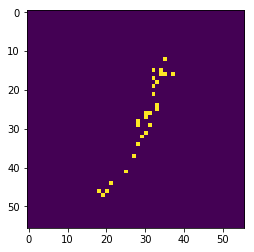

In [6]:
print('there are {} points to fire'.format(sum(im.ravel())))
plt.imshow(im)

In [7]:
gpl.build_gpl?
